(23699, 22)
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0

C:\Users\dezop\AppData\Local\Temp\ipykernel_38024\1918812303.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df[df['rooms'] == i]['last_price'].dropna() for i in range(1, 6)], labels=range(1, 6))


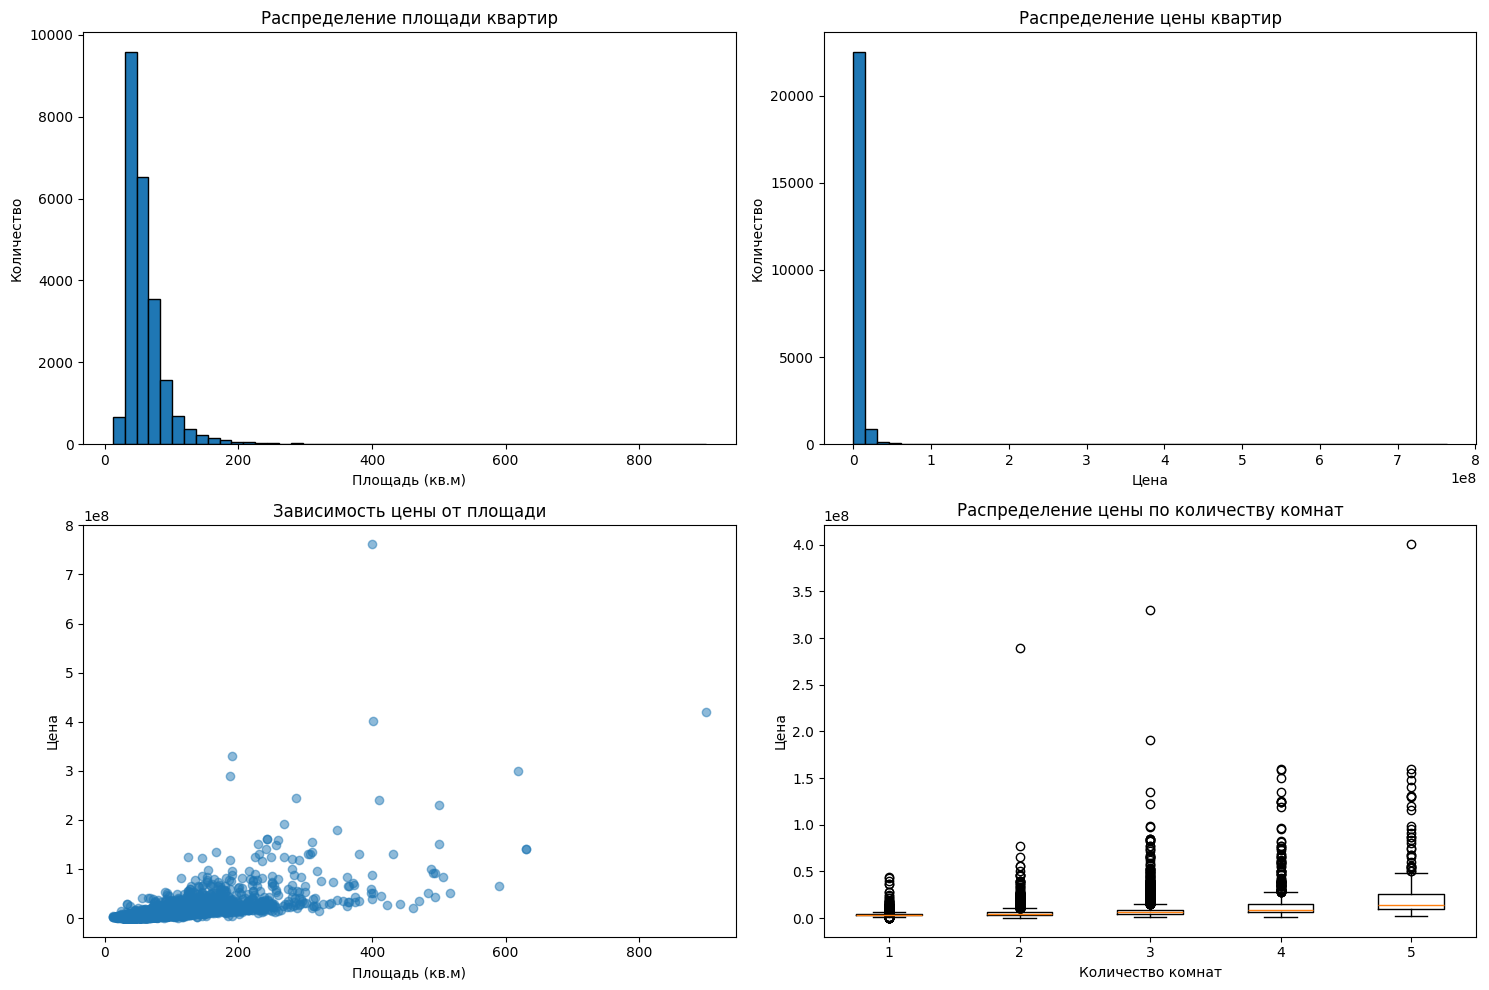

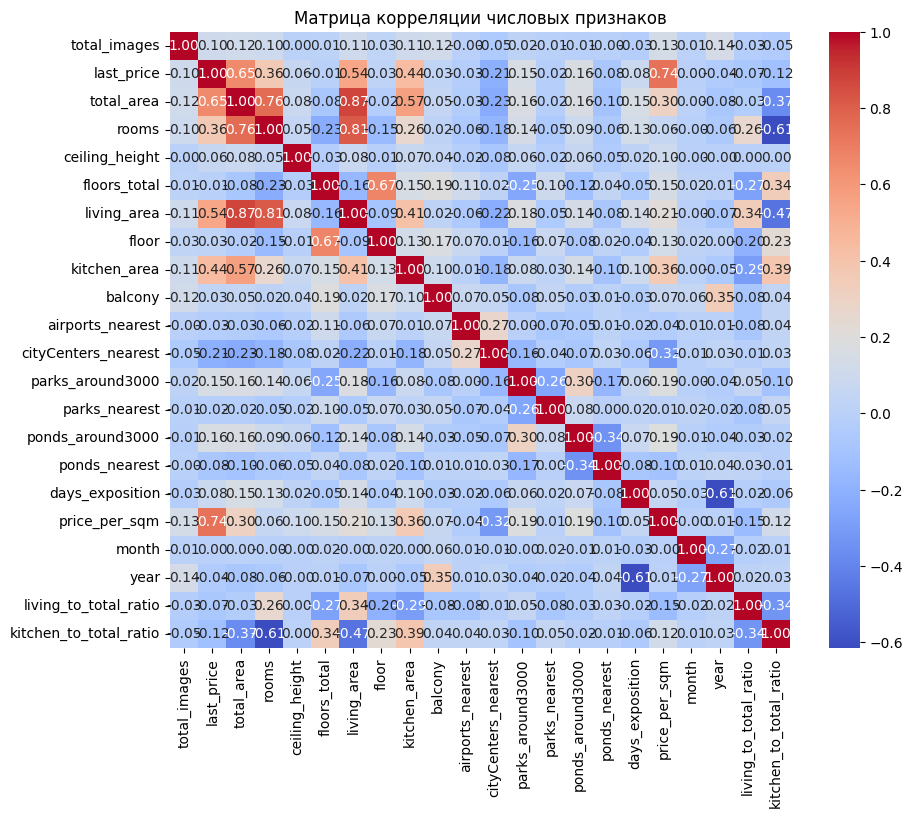

In [2]:
# Шаг 1: Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 2: Загрузка данных
df = pd.read_csv('Данные_обработанные_Егорина.csv', sep='\t', encoding='utf-8')

# Шаг 3: Предварительный осмотр данных
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

# Шаг 4: Обработка пропусков
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
df['living_area'].fillna(df['living_area'].median(), inplace=True)
df['kitchen_area'].fillna(df['kitchen_area'].median(), inplace=True)
df['floors_total'].fillna(df['floors_total'].median(), inplace=True)
df['floor'].fillna(df['floor'].median(), inplace=True)
df['rooms'].fillna(df['rooms'].median(), inplace=True)

# Шаг 5: Приведение типов
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('Int64')
df['floor'] = df['floor'].astype('Int64')
df['rooms'] = df['rooms'].astype('Int64')

# Шаг 6: Инженерия признаков
df['price_per_sqm'] = df['last_price'] / df['total_area']
df['day_of_week'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['living_to_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_to_total_ratio'] = df['kitchen_area'] / df['total_area']

df['floor_category'] = 'другой'
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'

# Шаг 7: Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['total_area'].dropna(), bins=50, edgecolor='black')
axes[0, 0].set_title('Распределение площади квартир')
axes[0, 0].set_xlabel('Площадь (кв.м)')
axes[0, 0].set_ylabel('Количество')

axes[0, 1].hist(df['last_price'].dropna(), bins=50, edgecolor='black')
axes[0, 1].set_title('Распределение цены квартир')
axes[0, 1].set_xlabel('Цена')
axes[0, 1].set_ylabel('Количество')

axes[1, 0].scatter(df['total_area'], df['last_price'], alpha=0.5)
axes[1, 0].set_title('Зависимость цены от площади')
axes[1, 0].set_xlabel('Площадь (кв.м)')
axes[1, 0].set_ylabel('Цена')

axes[1, 1].boxplot([df[df['rooms'] == i]['last_price'].dropna() for i in range(1, 6)], labels=range(1, 6))
axes[1, 1].set_title('Распределение цены по количеству комнат')
axes[1, 1].set_xlabel('Количество комнат')
axes[1, 1].set_ylabel('Цена')

plt.tight_layout()
plt.show()

# Шаг 8: Корреляционный анализ
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции числовых признаков')
plt.show()